<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/lessons/VisualisierungDatawrapperBreak-ins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisierung mit Datawrapper: Diagramme

In dieser Sitzung widmen wir uns dem Visualisieren unserer Ergebnisse mit [Datawrapper](https://app.datawrapper.de/chart/RFPfn/publish).

Datawrapper ist ein Visualisierungstool, das in den meisten Fällen gratis genutzt werden kann und in vielen Redaktionen verbreitet ist.

In diesem Notebook erzeugen wir nur die Daten für die Visualisierung, der Rest passiert über die Oberfläche in Datawrapper.

Wir behandeln hier nur sehr elementare Datenvisualisierungen. Der [Visual Almanach der Financial Times](https://ft-interactive.github.io/visual-vocabulary/) liefert aber einen sehr guten Überblick über verschiedene Darstellungsformen für verschiedene Zwecke.

:Im ersten Schritt importieren wir Pandas und laden den Datensatz mit den Züricher Hundedaten:

In [2]:
import pandas as pd

break_ins = pd.read_csv("https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00002042_00004083.csv")

break_ins.head()

,Ausgangsjahr,Gemeinde_BFS_Nr,Gemeindename,Stadtkreis_BFS_Nr,Stadtkreis_Name,Gesetz_Nummer,Gesetz_Abk,Tatbestand,Straftaten_total,Straftaten_vollendet,Straftaten_versucht,Einwohner,Häufigkeitszahl
0,2009,131,Adliswil,NaN,NaN,311.0,StGB,Einbruchdiebstahl,159,114,45,16052.0,9.9
1,2009,131,Adliswil,NaN,NaN,311.0,StGB,Einschleichdiebstahl,33,32,1,16052.0,2.1
2,2009,131,Adliswil,NaN,NaN,311.0,StGB,Einbrüche insgesamt,192,146,46,16052.0,12.0
3,2009,241,Aesch,NaN,NaN,311.0,StGB,Einbruchdiebstahl,10,7,3,987.0,10.1
4,2009,241,Aesch,NaN,NaN,311.0,StGB,Einschleichdiebstahl,2,2,0,987.0,2.0


## Barchart

Zuerst erzeugen wir ein Barchart - also ein Balkendiagramm.

Balkendiagramme sind meistens die sichere Variante, um kategorielle Daten zu visualisieren. In diesem Fall sind die Jahre unsere Kategorien. Linien- und Flächendiagramme sollten wir nur dann wählen, wenn die Daten kontinuierlich erhoben sind und nicht auf Monate oder Jahre aggregiert sind.

Wir wollen ein Diagramm für die Recherchefrage "Wie hat sich der Hundebestand in Zürich über die Jahre entwickelt?" erstellen. Wir gruppieren den Datensatz dafür wieder nach Jahren.

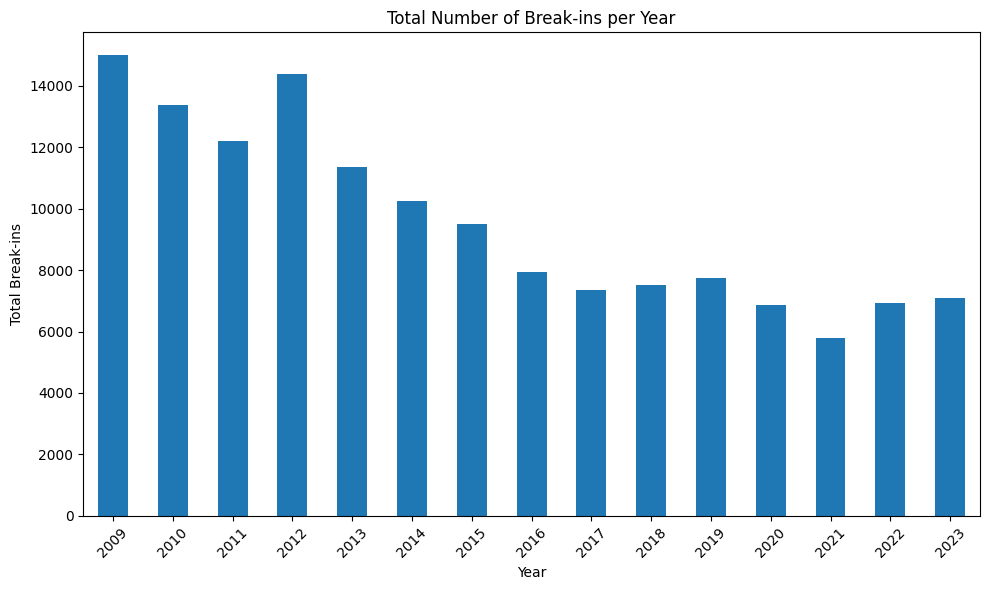

In [4]:
# prompt: Make a quick bar plot on the total number of break-ins per year. Only use columns where Einbrüche insgesamt.
# Ausgangsjahr	Gemeinde_BFS_Nr	Gemeindename	Stadtkreis_BFS_Nr	Stadtkreis_Name	Gesetz_Nummer	Gesetz_Abk	Tatbestand	Straftaten_total	Straftaten_vollendet	Straftaten_versucht	Einwohner	Häufigkeitszahl
# 0	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbruchdiebstahl	159	114	45	16052.0	9.9
# 1	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einschleichdiebstahl	33	32	1	16052.0	2.1
# 2	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbrüche insgesamt	192	146	46	16052.0	12.0
# 3	2009	241	Aesch	NaN	NaN	311.0	StGB	Einbruchdiebstahl	10	7	3	987.0	10.1
# 4	2009	241	Aesch	NaN	NaN	311.0	StGB	Einschleichdiebstahl	2	2	0	987.0	2.0

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'break_ins' DataFrame is already loaded as in the previous code

# Filter for "Einbrüche insgesamt"
break_ins_total = break_ins[break_ins["Tatbestand"] == "Einbrüche insgesamt"]

# Group by year and sum the total break-ins
break_ins_by_year = break_ins_total.groupby("Ausgangsjahr")["Straftaten_total"].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
break_ins_by_year.plot(kind="bar")
plt.title("Total Number of Break-ins per Year")
plt.xlabel("Year")
plt.ylabel("Total Break-ins")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Und schreiben ihn als `dogs_by_year.csv` auf die Festplatte.

In [5]:
break_ins_by_year.to_csv("break_ins_by_year.csv")

## Stacked Barcharts

Eine komplexere Form des Balkendiagramms ist das gestapelte oder das gruppierte Balkendiagramm, wo eine Hauptkategorie (in unserem Fall das Jahr) eine Unterkategorie mit mehreren Ausprägungen haben kann. Als Unterkategorie bietet sich bei unserem Datensatz das Geschlecht der Hunde an.



Dafür gruppieren wir den Datensatz nach Jahr und Geschlecht.

Mit der `unstack()`-Methode lösen wir den Multi-Index auf, so dass wir eine normale Tabelle bekommen, denn Datawrapper kann nicht mit Multi-Indizes arbeiten.

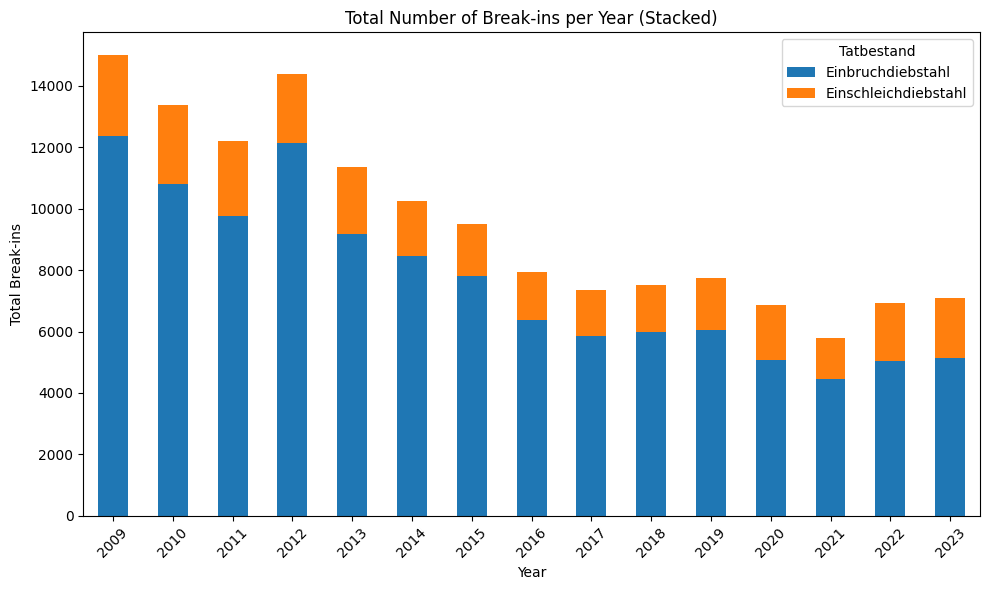

In [6]:
# prompt: Make a stacked bar plot on the total number of break-ins per year. Stack Einbruchdiebstahl and Einschleichdiebstahl.
# Ausgangsjahr	Gemeinde_BFS_Nr	Gemeindename	Stadtkreis_BFS_Nr	Stadtkreis_Name	Gesetz_Nummer	Gesetz_Abk	Tatbestand	Straftaten_total	Straftaten_vollendet	Straftaten_versucht	Einwohner	Häufigkeitszahl
# 0	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbruchdiebstahl	159	114	45	16052.0	9.9
# 1	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einschleichdiebstahl	33	32	1	16052.0	2.1
# 2	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbrüche insgesamt	192	146	46	16052.0	12.0
# 3	2009	241	Aesch	NaN	NaN	311.0	StGB	Einbruchdiebstahl	10	7	3	987.0	10.1
# 4	2009	241	Aesch	NaN	NaN	311.0	StGB	Einschleichdiebstahl	2	2	0	987.0	2.0

import pandas as pd
import matplotlib.pyplot as plt

break_ins = pd.read_csv("https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00002042_00004083.csv")

# Filter for Einbruchdiebstahl and Einschleichdiebstahl
filtered_break_ins = break_ins[break_ins["Tatbestand"].isin(["Einbruchdiebstahl", "Einschleichdiebstahl"])]

# Group by year and Tatbestand, then sum Straftaten_total
break_ins_grouped = filtered_break_ins.groupby(["Ausgangsjahr", "Tatbestand"])["Straftaten_total"].sum().unstack()

# Create the stacked bar plot
break_ins_grouped.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Total Number of Break-ins per Year (Stacked)")
plt.xlabel("Year")
plt.ylabel("Total Break-ins")
plt.xticks(rotation=45)
plt.legend(title="Tatbestand")
plt.tight_layout()
plt.show()

## Karten

Man kann zwei Hauptkategorien von Karten erstellen, Locator Maps und Choropleth Maps. Wir beschränken uns heute auf Choropleth Karten.

Choropleth Karten zeichenen eine vorher definierte Form mit einer Farbe aus, die sich am Wert orientert. Für Locator-Maps bräuchten wir Punkte auf der Karte - und die haben wir nicht.

Für die Kartendarstellung gruppieren wir den Datensatz nach Quartieren.

In [8]:
# prompt: Count the number of Einbrüche insgesamt for the most recent year and group by Gemeindename.
# Ausgangsjahr	Gemeinde_BFS_Nr	Gemeindename	Stadtkreis_BFS_Nr	Stadtkreis_Name	Gesetz_Nummer	Gesetz_Abk	Tatbestand	Straftaten_total	Straftaten_vollendet	Straftaten_versucht	Einwohner	Häufigkeitszahl
# 0	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbruchdiebstahl	159	114	45	16052.0	9.9
# 1	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einschleichdiebstahl	33	32	1	16052.0	2.1
# 2	2009	131	Adliswil	NaN	NaN	311.0	StGB	Einbrüche insgesamt	192	146	46	16052.0	12.0
# 3	2009	241	Aesch	NaN	NaN	311.0	StGB	Einbruchdiebstahl	10	7	3	987.0	10.1
# 4	2009	241	Aesch	NaN	NaN	311.0	StGB	Einschleichdiebstahl	2	2	0	987.0	2.0

import pandas as pd

# Assuming 'break_ins' DataFrame is already loaded as in the previous code
break_ins = pd.read_csv("https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00002042_00004083.csv")

# Find the most recent year
most_recent_year = break_ins["Ausgangsjahr"].max()

# Filter data for the most recent year and "Einbrüche insgesamt"
recent_break_ins = break_ins[
    (break_ins["Ausgangsjahr"] == most_recent_year)
    & (break_ins["Tatbestand"] == "Einbrüche insgesamt")
]

# Group by Gemeindename and sum Einbrüche insgesamt
break_ins_by_gemeinde = recent_break_ins.groupby("Gemeindename")["Straftaten_total"].sum()

break_ins_by_gemeinde

,Straftaten_total
Gemeindename,
Adliswil,60
Aesch,7
Aeugst,7
Affoltern,54
Altikon,1
...,...
Zell,9
Zollikon,84
Zumikon,40


In [9]:
break_ins_by_gemeinde.to_csv("break_ins_by_gemeinde.csv")